### Campaign for selling personal loans project.

Import all necessary python Packages 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split

Read the column description and first 5 records from the dataset

In [3]:
bnk_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bnk_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
896,897,50,24,161,95133,3,3.4,1,212,1,0,0,1,0
1578,1579,38,13,12,94143,2,0.3,2,104,0,1,0,1,0
522,523,36,11,72,91007,1,2.8,1,224,0,0,0,0,0
4235,4236,27,1,91,92173,2,0.2,1,0,0,0,0,1,0
4787,4788,48,22,42,95054,3,0.6,2,121,0,0,0,1,0
3659,3660,33,7,22,94002,1,0.4,2,0,0,0,0,0,0
2944,2945,55,30,79,92182,2,0.0,3,0,0,0,0,0,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1
4678,4679,33,7,115,93305,1,2.7,2,283,0,0,0,1,0
484,485,25,1,113,95023,2,0.2,1,0,0,0,0,1,1


### Data Description:

 1. ID:	Customer ID							
 2. Age:	Customer's age in completed years							
 3. Experience:	#years of professional experience							
 4. Income:	Annual income of the customer(Dollar)	
 5. ZIP Code:	Home Address ZIP code.		
 6. Family:	Family size of the customer		
 7. CCAvg:	Avg. spending on credit cards per month(Dollar)							
 8. Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
 9. Mortgage:	Value of house mortgage if any. (Dollar)							
 10. Personal Loan:	Did this customer accept the personal loan offered in the last campaign?							
 11. Securities Account:	Does the customer have a securities account with the bank?							
 12. CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?							
 13. Online:	Does the customer use internet banking facilities?							
 14. CreditCard:	Does the customer use a credit card issued by UniversalBank?							


#### 1.Read the column description and ensure you understand each attribute well
Read the column header and Understand each attribute and the attributes can be divided accordingly :

In [205]:
bnk_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

ID:- ID Column  does not add any interesting information. also it does not provide any general conclusion for future potential loan customers. We can remove  this  information for our model prediction.

#### The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

Credit Card - Does the customer use a credit card issued by UniversalBank?

#### Interval variables are as below:
Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage

#### Ordinal Categorical Variables are:

Family - Family size of the customer

Education - education level of the customer

#### The nominal variable is :

ID -- Not going to contribute as mentioned above (From Domain Idea)

Zip Code

In [206]:
# Shape of the data
bnk_df.shape

(5000, 14)

Describe each of the column data-type and either any missing values exist or not, Along with these information it also describes total number of row and column 

In [207]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We can check from the below code either any missing value exist or not

In [208]:
# No columns have null data in the file
bnk_df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Above show "0" means non of the column are having missing value

#### Five Statistics (Mean,std,min,max,quatile) as below

In [209]:
# Eye balling the data
bnk_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [210]:
#finding unique data under each of the column
bnk_df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### 2. Study the data distribution in each attribute, share your findings.

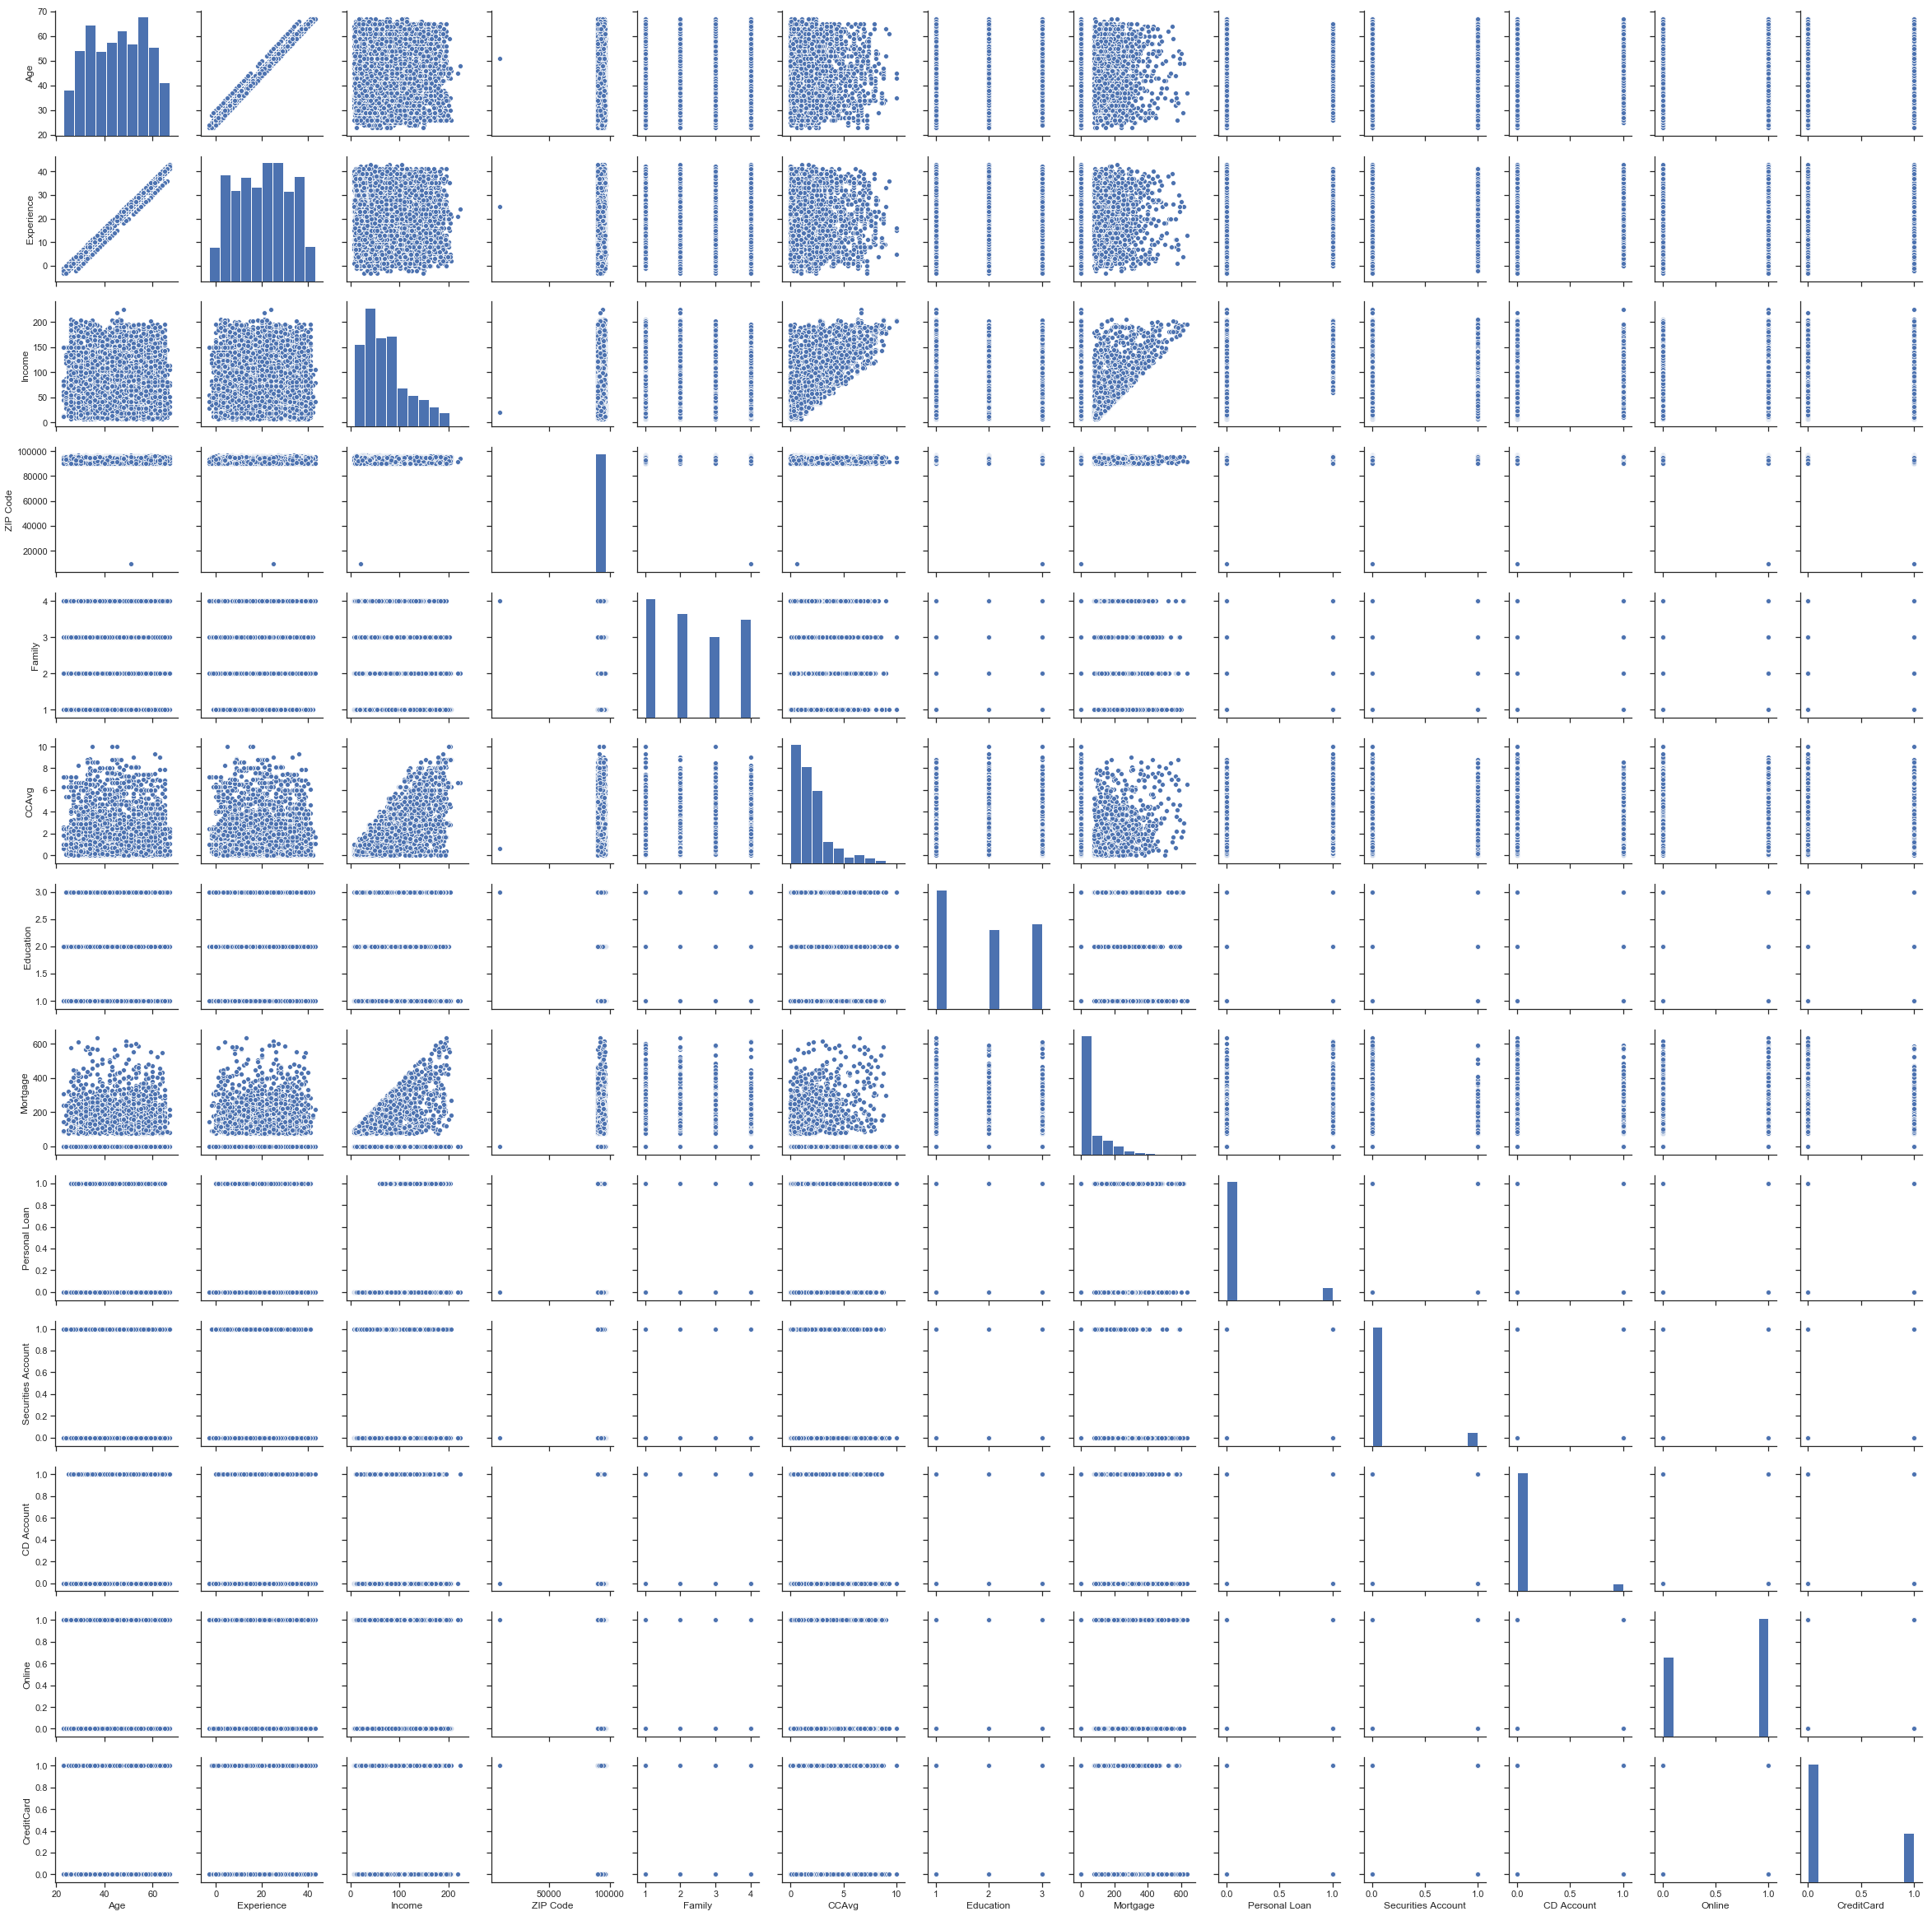

In [212]:
sns.pairplot(bnk_df.iloc[:,1:])

Description for the above pair plot


--> Age Column is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

--> Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

--> Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

--> CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

--> Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

--> The variables family and education are ordinal variables. The distribution of families is evenly distributes


In [213]:
bnk_df[bnk_df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [214]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
bnk_df[bnk_df['Experience'] < 0]['Experience'].count()

52

In [215]:
#clean the negative variable
dfExp = bnk_df.loc[bnk_df['Experience'] >0] # filter the positive exprience
negExp = bnk_df.Experience < 0  # this will return true where the value of the column is less than 0
column_name = 'Experience'
negativelist = bnk_df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

The following code does the below steps:

For the record with the ID, get the value of Age column 

For the record with the ID, get the value of Education column

Filter the records matching the above criteria from the data frame which has records with positive experience and take the median

Apply the median back to the location which had negative experience


In [216]:
for id in negativelist:
    age = bnk_df.loc[np.where(bnk_df['ID']==id)]["Age"].tolist()[0]
    education = bnk_df.loc[np.where(bnk_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    bnk_df.loc[bnk_df.loc[np.where(bnk_df['ID']==id)].index, 'Experience'] = exp

In [217]:
# checking if there are records with negative experience
bnk_df[bnk_df['Experience'] < 0]['Experience'].count()

0

As we show that we dont have any negative exprience 

In [218]:
bnk_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### 3. Target column distribution and comments
Influence of income and education on personal loan

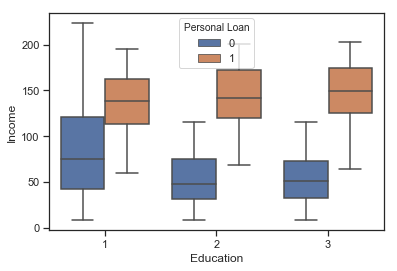

In [219]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bnk_df)

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

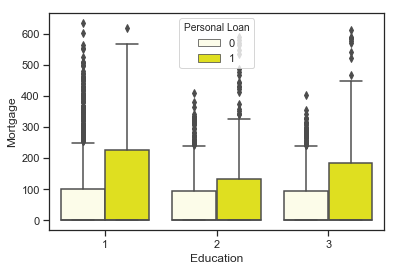

In [220]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bnk_df,color='yellow')

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

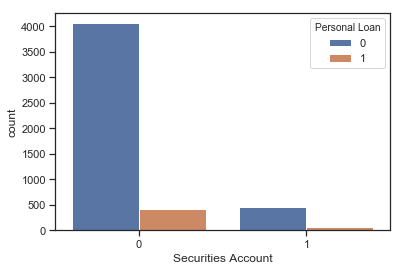

In [221]:
sns.countplot(x="Securities Account", data=bnk_df,hue="Personal Loan")

Observation : Majority of customers who does not have loan have securities account

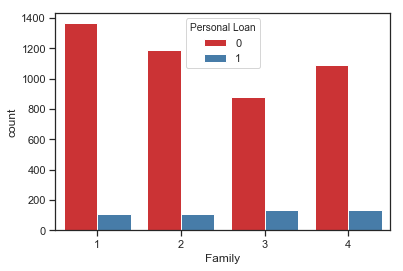

In [222]:
sns.countplot(x='Family',data=bnk_df,hue='Personal Loan',palette='Set1')

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

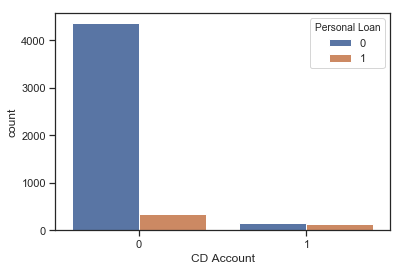

In [223]:
sns.countplot(x='CD Account',data=bnk_df,hue='Personal Loan')

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

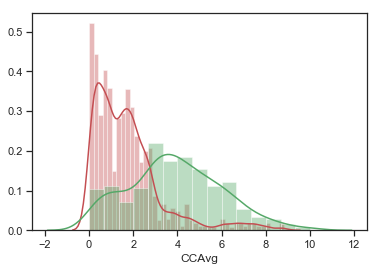

In [224]:
sns.distplot( bnk_df[bnk_df["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( bnk_df[bnk_df["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [225]:
print('Credit card spending of Non-Loan customers: ', bnk_df[bnk_df["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bnk_df[bnk_df["Personal Loan"] == 1 ]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

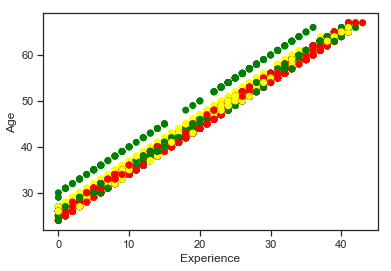

In [226]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bnk_df['Experience'],bnk_df['Age'],c=bnk_df['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

Observation The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

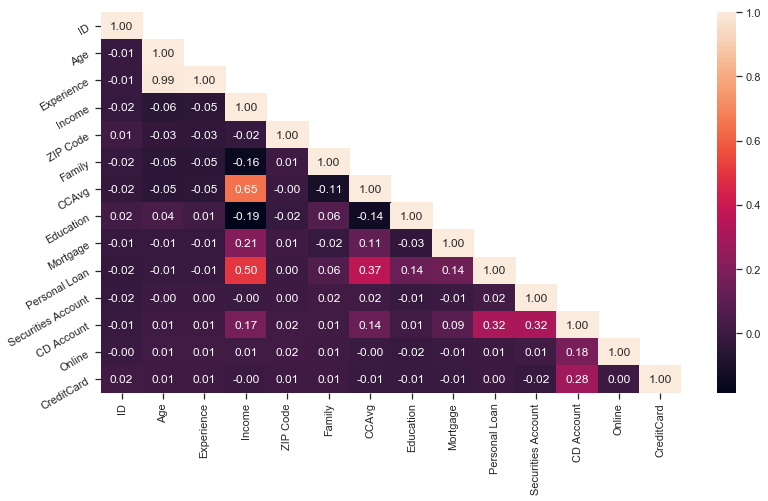

In [227]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = bnk_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Observation

Income and CCAvg is moderately correlated.

Age and Experience is highly correlated

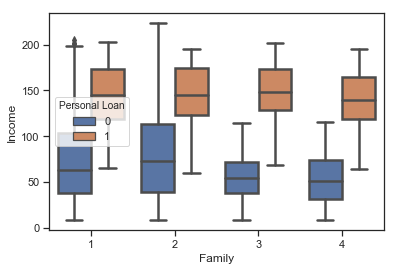

In [228]:
sns.boxplot(x=bnk_df.Family,y=bnk_df.Income,hue=bnk_df["Personal Loan"])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

Personal Loan
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CD Account, dtype: object

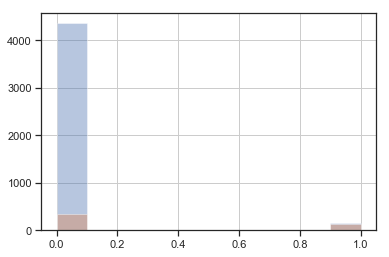

In [286]:
#Class distribution with respect to "CD Account"
bnk_df.groupby('Personal Loan')["CD Account"].hist(alpha=0.4)

Personal Loan
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Mortgage, dtype: object

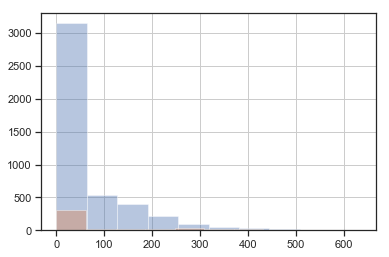

In [287]:
#Class distribution with respect to "CD Account"
bnk_df.groupby('Personal Loan')["Mortgage"].hist(alpha=0.4) 

Personal Loan
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Income, dtype: object

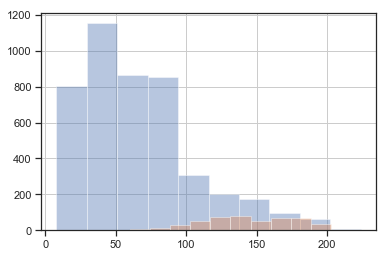

In [281]:
#Class distribution with respect to "Income"
bnk_df.groupby('Personal Loan').Income.hist(alpha=0.4)

#### 4. Split the data into training and test set in the ratio of 70:30 respectively
Split the dataset into training and test sets with 70-30 ratio.

Droping the highly correlated column(Experience) , ID etc... 

In [229]:
bnk_df=bnk_df.drop(['ID','Experience'], axis=1)
# Copy all the predictor variables into X dataframe. Since 'Personal Loan' is dependent variable drop it
X = bnk_df.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = bnk_df[['Personal Loan']]

In [230]:
bnk_df.sample(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1254,36,40,91101,2,0.60,3,0,0,0,0,1,1
1729,50,25,91320,4,0.40,3,0,0,0,0,1,0
1396,42,43,91107,1,0.30,3,158,0,0,0,0,0
4939,54,70,92093,3,2.00,2,116,0,0,0,1,1
1132,34,55,94920,3,2.30,1,0,0,1,1,1,1
866,44,70,94611,4,1.90,1,0,0,0,0,1,0
3011,55,63,95616,3,2.67,1,0,0,0,0,1,0
3969,38,75,94305,3,2.33,2,0,0,0,0,1,0
1143,33,120,94022,1,3.20,3,0,1,0,0,1,0
3042,52,78,94301,3,3.00,2,0,0,0,0,0,0


In [320]:
y.groupby(['Personal Loan']).size()

Personal Loan
0    4520
1     480
dtype: int64

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [322]:
#from imblearn.over_sampling import SMOTE
#from imblearn.datasets import make_imbalance
#from imblearn.under_sampling import NearMiss
#from imblearn.pipeline import make_pipeline
#from imblearn.metrics import classification_report_imbalanced

#### Using Random Forest model , Select the important feature to predict the personal loan customer

In [297]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

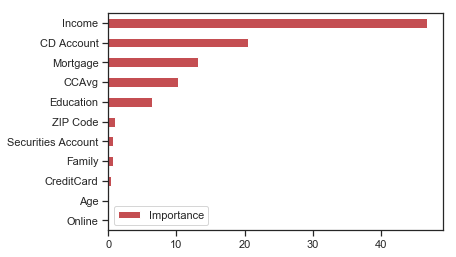

In [254]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

As we show Income,CD Account,Mortage,CC Avg,Education are the columns having more contribution in decending order

#### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

#### a. K-NN  Model

In [255]:
# Check either andy NAN value exist or not
df1 = X[X.isna().any(axis=1)]
df1

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


In [266]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)    
knn_predicted = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, knn_predicted)
print(" K-NN Model accuracy_score : ",acc)

 K-NN Model accuracy_score :  0.9


#### b. Logistic

In [293]:
logitModel = LogisticRegression()
logitModel.fit(X_train, y_train)
logistic_predicted = logitModel.predict(X_test)
# Use score method to get accuracy of model
score = logitModel.score(X_test, y_test)
print("Logistic Score : ",score)

Logistic Score :  0.9073333333333333


In [272]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, logistic_predicted))

0.9073333333333333


#### c. Naive Bayes

In [344]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

naive_model_prediction = naive_model.predict(X_test)
score=naive_model.score(y_test,naive_model_prediction)
print("Naive Bayes Score : ",score)

Naive Bayes Score :  0.8706666666666667


#### Compare Model -- Report

KNN: 0.898600 (0.008902)
Logit: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


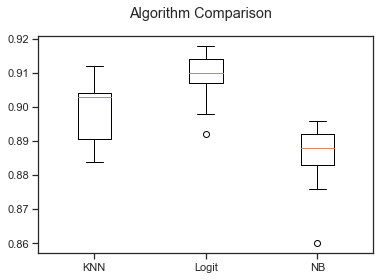

In [367]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Logit', LogisticRegression()))
models.append(('NB', GaussianNB()))
#models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above graph , it seems like Logistic algorithm have the highest accuracy and we can choose that as our final model

#### 6. Print the confusion matrix for all the above models

#### Confusion matrix
Table that describes the performance of a KNN-classification model

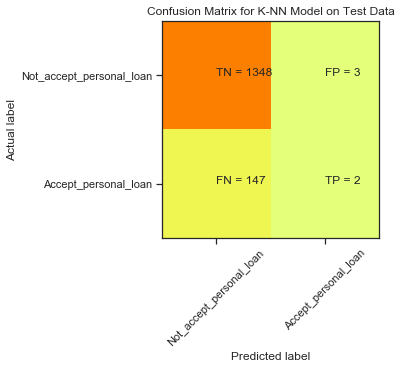

In [298]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, knn_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not_accept_personal_loan','Accept_personal_loan']
plt.title('Confusion Matrix for K-NN Model on Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Confusion matrix
Table that describes the performance of a Logistic-classification model

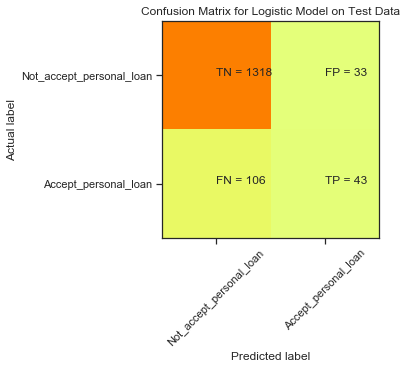

In [299]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, logistic_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not_accept_personal_loan','Accept_personal_loan']
plt.title('Confusion Matrix for Logistic Model on Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Confusion matrix
Table that describes the performance of a GaussianNB-classification model

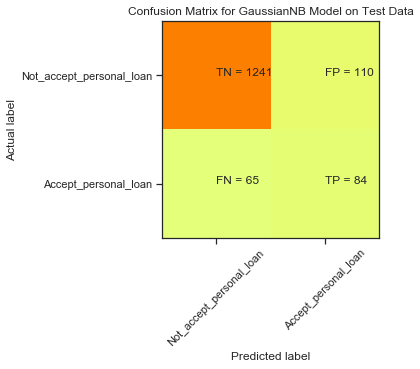

In [300]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, naive_model_prediction)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not_accept_personal_loan','Accept_personal_loan']
plt.title('Confusion Matrix for GaussianNB Model on Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [313]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("**********************************KNN Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, knn_predicted))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, knn_predicted))

print("**********************************Logistic Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, logistic_predicted))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, logistic_predicted))
print("**********************************NaiveBase Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, naive_model_prediction))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, naive_model_prediction))

**********************************KNN Model********************************** 

Clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.40      0.01      0.03       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.65      0.51      0.49      1500
weighted avg       0.85      0.90      0.86      1500


Confussion matrix:
 [[1348    3]
 [ 147    2]]
**********************************Logistic Model********************************** 

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500


Confussion matrix:
 [[1318   33]
 [ 106   43]]
**********************************Naive

#### 7. Give your reasoning on which is the best model in this case and why it performs better?

In [360]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("**********************************KNN Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, knn_predicted))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, knn_predicted))

print("**********************************Logistic Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, logistic_predicted))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, logistic_predicted))
print("**********************************NaiveBase Model********************************** ")
print ('\nClasification report:\n', classification_report(y_test, naive_model_prediction))
print ('\nConfussion matrix:\n',confusion_matrix(y_test, naive_model_prediction))

**********************************KNN Model********************************** 

Clasification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.40      0.01      0.03       149

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.65      0.51      0.49      1500
weighted avg       0.85      0.90      0.86      1500


Confussion matrix:
 [[1348    3]
 [ 147    2]]
**********************************Logistic Model********************************** 

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500


Confussion matrix:
 [[1318   33]
 [ 106   43]]
**********************************Naive

#### ROC Curve Analysis

In [354]:
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [356]:
#For KNN-Model
probas1_ = knn.predict_proba(X_test)
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.868944


In [364]:
#For Logistic-Model
probas2_ = logitModel.predict_proba(X_test)
# Compute ROC curve and area the curve for logistic
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.915807


In [365]:
#For GaussianNB-Model
probas3_ = naive_model.predict_proba(X_test)
# Compute ROC curve and area the curve for logistic
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc3)

Area under the ROC curve : 0.917093


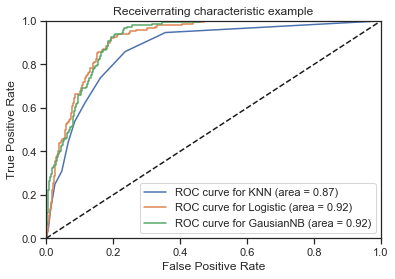

In [366]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for KNN (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for Logistic (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for GausianNB (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

--> From the above classification report and "Compare Model" report  we are sure that Logistic model is the better model. 

--> Logistic regression is a powerful statistical way of modeling a binomial outcome (takes the value 0 or 1 like accepting  or not accepting a loan) with one or more explanatory variables.

--> As the above multiple model we show that logistic regression is giving the more accuracy as compare with other 2 model

--> The reason logistic regression is giving higher accuracy is due to the data is linearly distributed

--> Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature

--> The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

--> The independent variables are linearly related to the log odds.

#### Note:

I had used the Random Forest, it's accuracy showed me more than Logistic regression , I am not keeping here because of it is asked to compare between KNN,Logistic,NB. So I am skipping the RF model (In production Random formest would be the better than other)